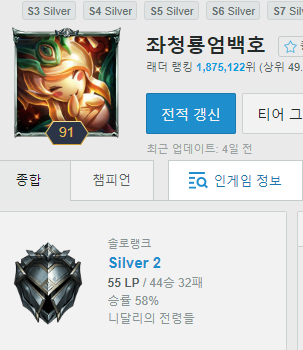
골드 갈 수 있을까?

In [1]:
# 기본 패키지 올리기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
#시각화 보조
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


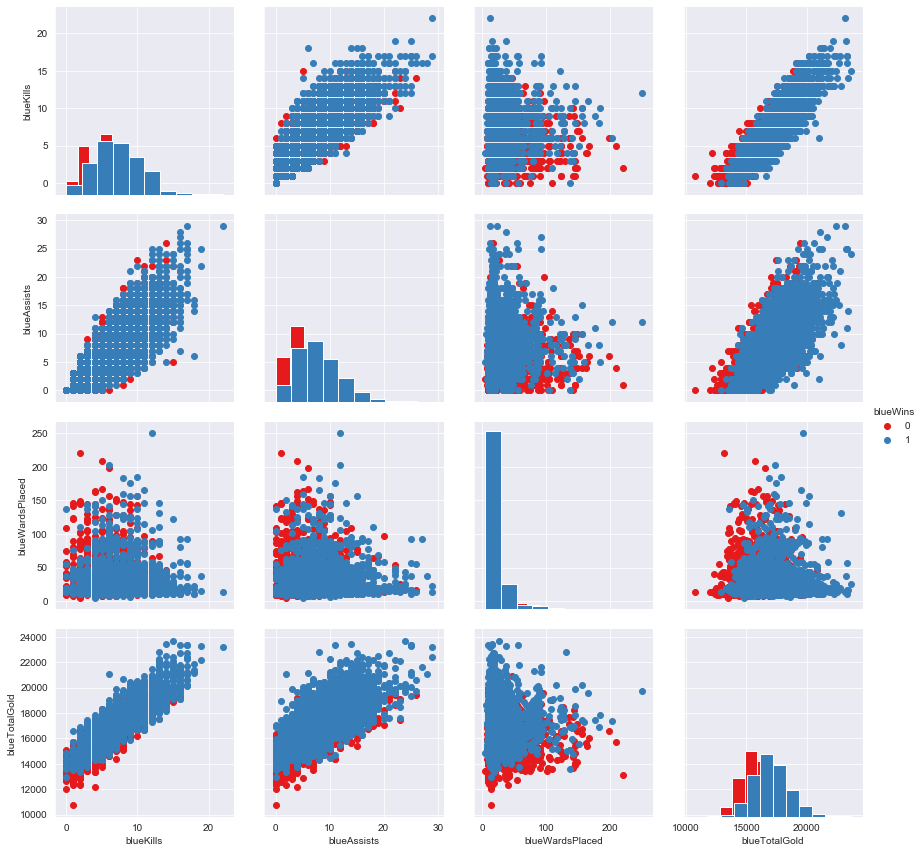

In [4]:
g = sns.PairGrid(data=df, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', size=3, palette='Set1')
#대각 행렬 히스토그램
g.map_diag(plt.hist)
#나머지 산점도
g.map_offdiag(plt.scatter)
g.add_legend();

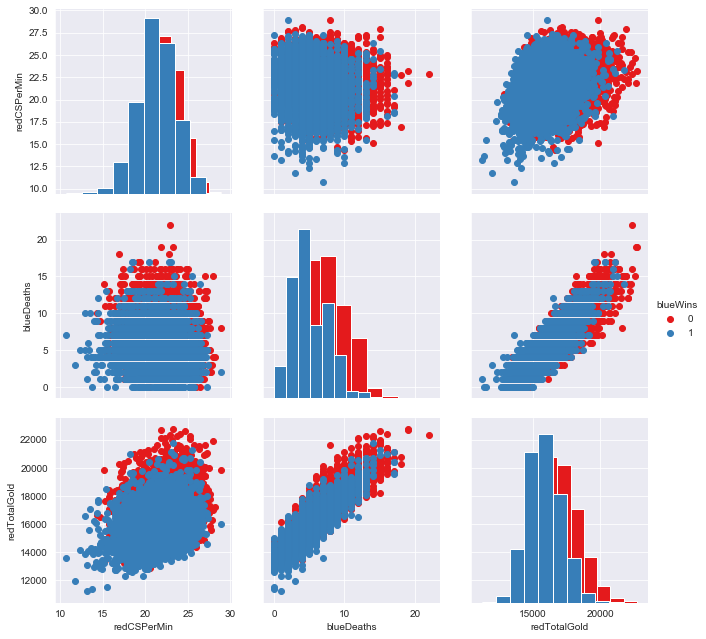

In [5]:
g = sns.PairGrid(data=df, vars=['redCSPerMin', 'blueDeaths','redTotalGold'], hue='blueWins', size=3, palette='Set1')
#대각 행렬 히스토그램
g.map_diag(plt.hist)
#나머지 산점도
g.map_offdiag(plt.scatter)
g.add_legend();

In [6]:
# 불필요한 열 제거
cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']
df_clean = df.drop(cols, axis = 1)
df_clean.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,blueTotalExperience,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redDeaths,redAssists,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience
0,0,28,2,1,9,6,11,0,0,0,...,17039,36,15,6,9,8,0,16567,6.8,17047
1,0,12,1,0,5,5,5,0,0,0,...,16265,43,12,1,5,2,1,17620,6.8,17438
2,0,15,0,0,7,11,4,1,1,0,...,16221,46,15,3,7,14,0,17285,6.8,17254
3,0,43,1,0,4,5,5,1,0,1,...,17954,55,15,2,4,10,0,16478,7.0,17961
4,0,75,4,0,6,6,6,0,0,0,...,18543,57,17,2,6,7,0,17404,7.0,18313


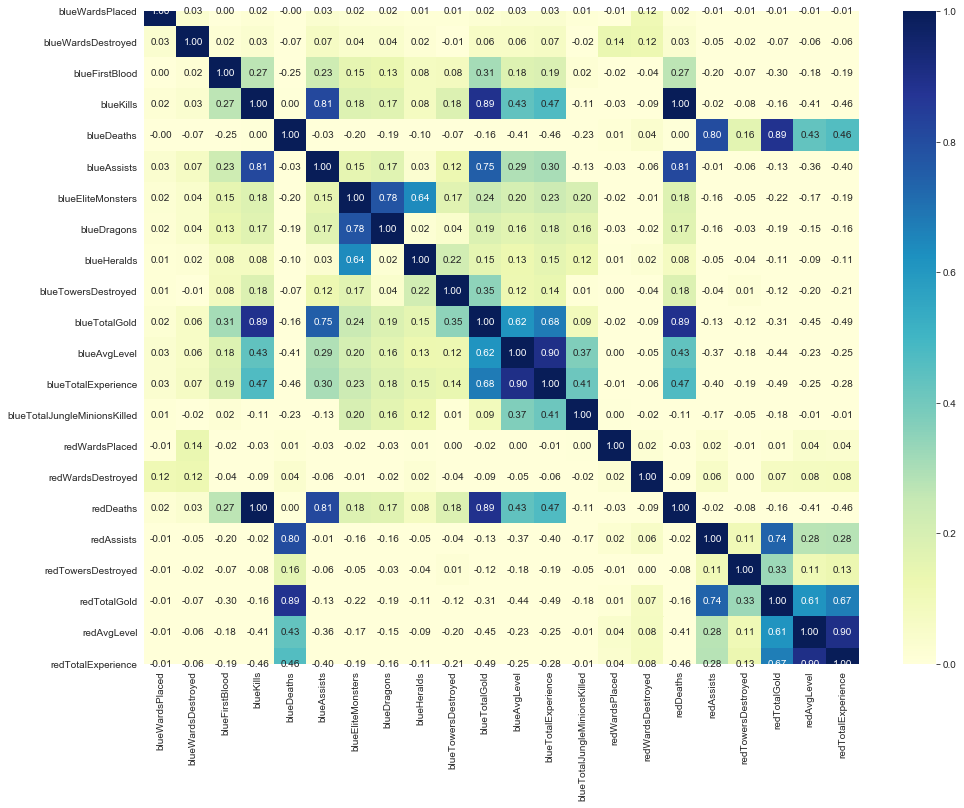

In [7]:
#상관분석
plt.figure(figsize=(16, 12))
sns.heatmap(df_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [8]:
X = df_clean
y = df['blueWins']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: blueWins, dtype: int64

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

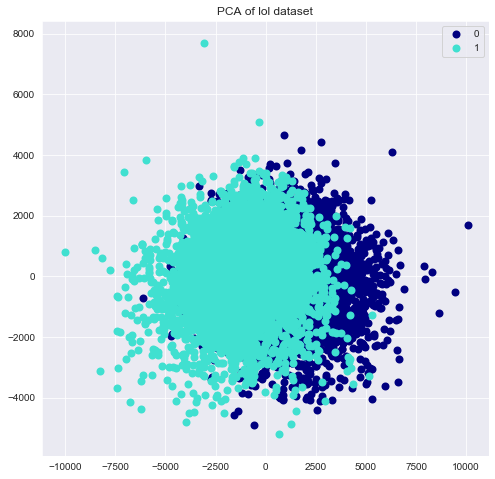

In [10]:
import matplotlib.pyplot as plt
colors = ['navy', 'turquoise']
for X_transformed, title in [(X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1], y):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
            color=color, lw=2, label=i)
        plt.title(title + " of lol dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

In [11]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)

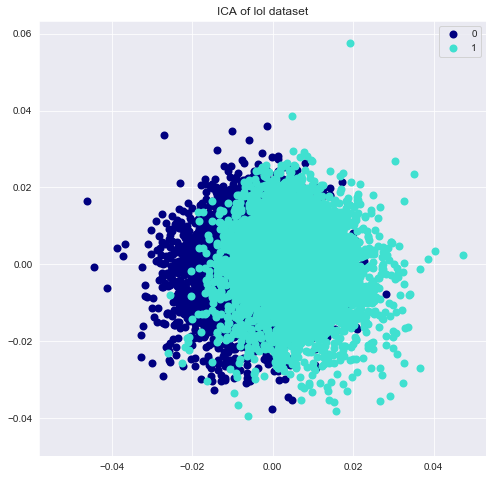

In [12]:
import matplotlib.pyplot as plt
colors = ['navy', 'turquoise']
for X_transformed, title in [(X_ica, "ICA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1], y):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
            color=color, lw=2, label=i)
        plt.title(title + " of lol dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [14]:
df.drop(['gameId','redFirstBlood','blueTotalGold','redTotalGold','blueTotalExperience','redTotalExperience','redGoldDiff','redExperienceDiff','redKills','redDeaths'], axis=1, inplace=True)

In [15]:
targets = df[['blueWins']].values
features = df.drop('blueWins', axis=1).values

In [16]:
features.shape , targets.shape

((9879, 29), (9879, 1))

In [17]:
test_size = int(.10 * 9879) # represents size of validation set
val_size = test_size
train_size = 9879 - test_size*2
train_size , val_size, test_size

(7905, 987, 987)

In [18]:
dataset = TensorDataset(torch.tensor(features).float(), torch.from_numpy(targets).float())
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

In [19]:
batch_size = 128

In [20]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
test_loader = DataLoader(test_ds, batch_size)

In [21]:
for xb, yb in train_loader:
    print(xb.shape, yb.shape)
    print(xb, yb)
    break # check if train_loader works

torch.Size([128, 29]) torch.Size([128, 1])
tensor([[1.2000e+01, 3.0000e+00, 1.0000e+00,  ..., 6.0000e+01, 2.4700e+01,
         1.7531e+03],
        [4.0000e+01, 2.0000e+00, 1.0000e+00,  ..., 2.4000e+01, 1.8400e+01,
         1.3245e+03],
        [1.6000e+01, 5.0000e+00, 1.0000e+00,  ..., 4.8000e+01, 2.1800e+01,
         1.4752e+03],
        ...,
        [1.9000e+01, 4.0000e+00, 0.0000e+00,  ..., 4.0000e+01, 2.3000e+01,
         1.4833e+03],
        [1.8000e+01, 4.0000e+00, 0.0000e+00,  ..., 4.2000e+01, 1.9200e+01,
         1.6730e+03],
        [1.5000e+01, 3.0000e+00, 1.0000e+00,  ..., 6.0000e+01, 2.0100e+01,
         1.7763e+03]]) tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.

In [28]:
input_size = 29 # all the feature columns
output_size = 1 # probability of 0 to 1 in the chances of blue side winning
threshold = 0.5

In [29]:
class LOLModel(nn.Module):
    def __init__(self):
        # initiate the model
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, xb):
        # forward function of the model 
        out = self.sigmoid(self.linear(xb))
        return out
    
    def training_step(self, batch):
        # used for training per batch in an eopch
        inputs, labels = batch
        out = self(inputs)
        loss = F.binary_cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        # used on function `evaluate` to iterate model through a batch
        inputs, labels = batch
        out = self(inputs)
        loss = F.binary_cross_entropy(out, labels)
        acc = accuracy(out, labels)
        # `.detach()` makes sure gradient is not tracked
        return {'val_loss': loss.detach(), 'val_acc' : acc.detach()}
    
    def validation_epoch_end(self, outputs):
        # calculate mean loss and accuracy for batch called w/ `evaluate`
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # print function to see what's going on
        if ((epoch+1) % 10 == 0) or (epoch == (num_epochs-1)):
            # print for every 5 epochs
            print("Epoch [{}], val_loss: {:.4f}, val_acc {:.4f}".format(epoch+1, result['val_loss'], result['val_acc']))

In [30]:
def accuracy(out, labels):
    return torch.tensor(torch.sum(abs(out-labels) < threshold).item() / len(out))

In [31]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LOLModel()

In [33]:
evaluate(model, val_loader)

{'val_loss': 19.74810791015625, 'val_acc': 0.2942565381526947}

In [34]:
history = fit(750, .0001, model, train_loader, val_loader)

Epoch [10], val_loss: 19.5790, val_acc 0.2962
Epoch [20], val_loss: 19.6778, val_acc 0.2962
Epoch [30], val_loss: 19.6636, val_acc 0.2962
Epoch [40], val_loss: 19.7075, val_acc 0.2952
Epoch [50], val_loss: 19.6364, val_acc 0.2962
Epoch [60], val_loss: 19.6758, val_acc 0.2972
Epoch [70], val_loss: 19.6614, val_acc 0.2972
Epoch [80], val_loss: 19.6329, val_acc 0.2952
Epoch [90], val_loss: 19.6297, val_acc 0.2962
Epoch [100], val_loss: 19.7784, val_acc 0.2962
Epoch [110], val_loss: 19.7477, val_acc 0.2962
Epoch [120], val_loss: 19.7826, val_acc 0.2976
Epoch [130], val_loss: 19.6722, val_acc 0.2986
Epoch [140], val_loss: 19.7077, val_acc 0.2986
Epoch [150], val_loss: 19.7275, val_acc 0.2986
Epoch [160], val_loss: 19.6949, val_acc 0.2986
Epoch [170], val_loss: 19.7063, val_acc 0.2986
Epoch [180], val_loss: 19.6659, val_acc 0.2986
Epoch [190], val_loss: 19.7784, val_acc 0.2986
Epoch [200], val_loss: 19.7640, val_acc 0.2976
Epoch [210], val_loss: 19.8821, val_acc 0.2986
Epoch [220], val_loss:

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

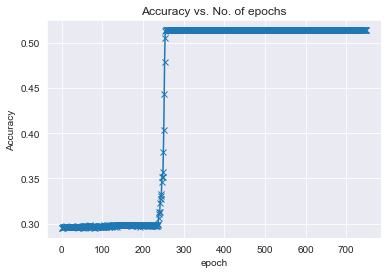

In [35]:
accuracies = [r['val_acc'] for r in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. No. of epochs')

In [36]:
evaluate(model, test_loader)

{'val_loss': 13.293035507202148, 'val_acc': 0.5189088582992554}